In [2]:
import shap
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics 
from sklearn.metrics import f1_score

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

C:\Users\NEEL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('Cancer_Data.csv')
df = df.drop('id',axis = 1)
df = df.drop('Unnamed: 32',axis = 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df['diagnosis'] = df['diagnosis'].replace(to_replace={'B': 0, 'M': 1})
df = (df-df.min())/(df.max()-df.min())
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

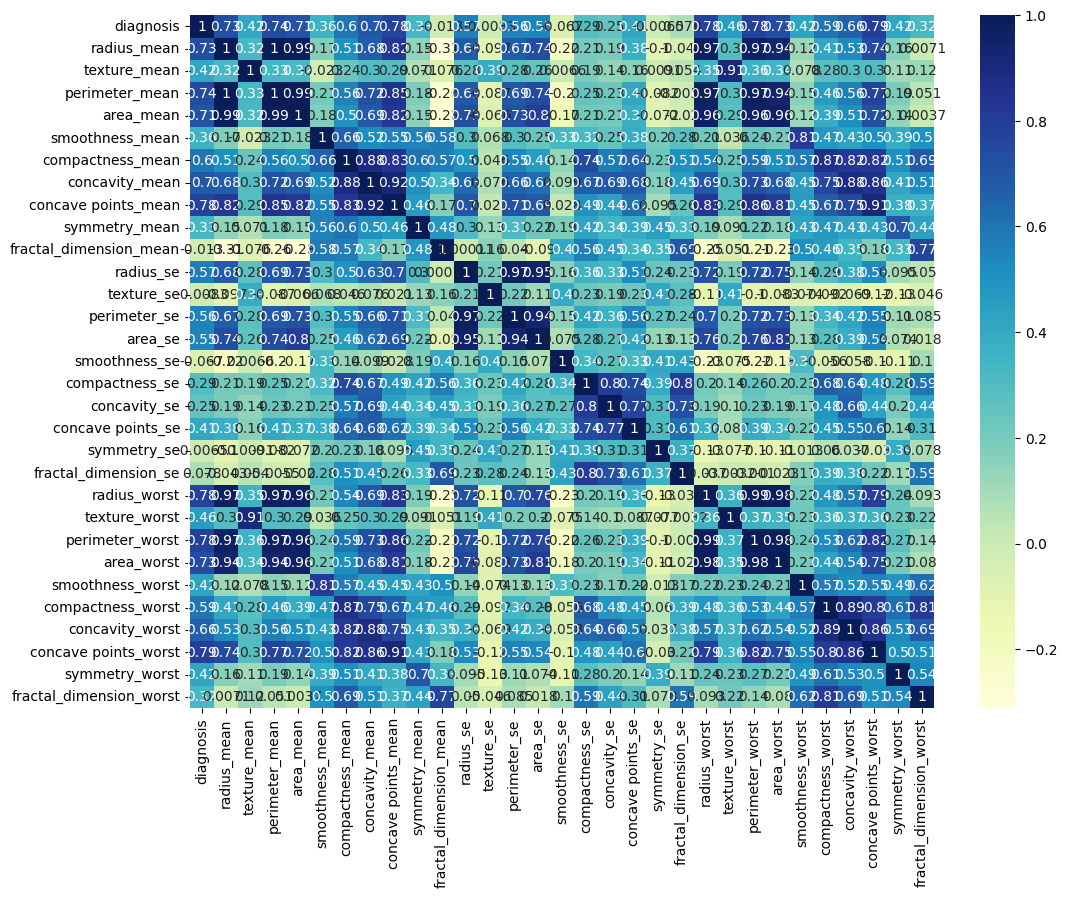

In [6]:

df.corr()
plt.figure(figsize=(12, 9))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [7]:
X = df.drop('diagnosis', axis= 1)
y = df['diagnosis']

In [8]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, random_state= 109)

In [9]:
# Setup random hypterparameter search for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose=True, n_jobs=-1)

gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 29.763514416313132, 'solver': 'liblinear'}

In [10]:
log_reg_best = gs_log_reg.best_estimator_
log_reg_best.score(X_test,y_test)
y_preds = log_reg_best.predict(X_test)
f1_score(y_test, y_preds)

0.9873417721518987

In [11]:
log_reg_best.score(X_test,y_test)

0.9912280701754386

In [12]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
gs_svm = GridSearchCV(svm.SVC(probability=True), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
gs_svm.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.901 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.912 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [13]:
svm_best = gs_svm.best_estimator_
svm_best.score(X_test,y_test)

X has feature names, but SVC was fitted without feature names


0.9912280701754386

In [14]:
y_preds_svm = svm_best.predict(X_test)
f1_score(y_test, y_preds_svm)

X has feature names, but SVC was fitted without feature names


0.9873417721518987

In [15]:
explainer = shap.KernelExplainer(svm_best.predict, shap.kmeans(X_train,10))
shap.initjs()

In [16]:
s_values = explainer.shap_values(X_test.values)

  0%|          | 0/114 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  1%|          | 1/114 [00:00<00:20,  5.60it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipelin

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


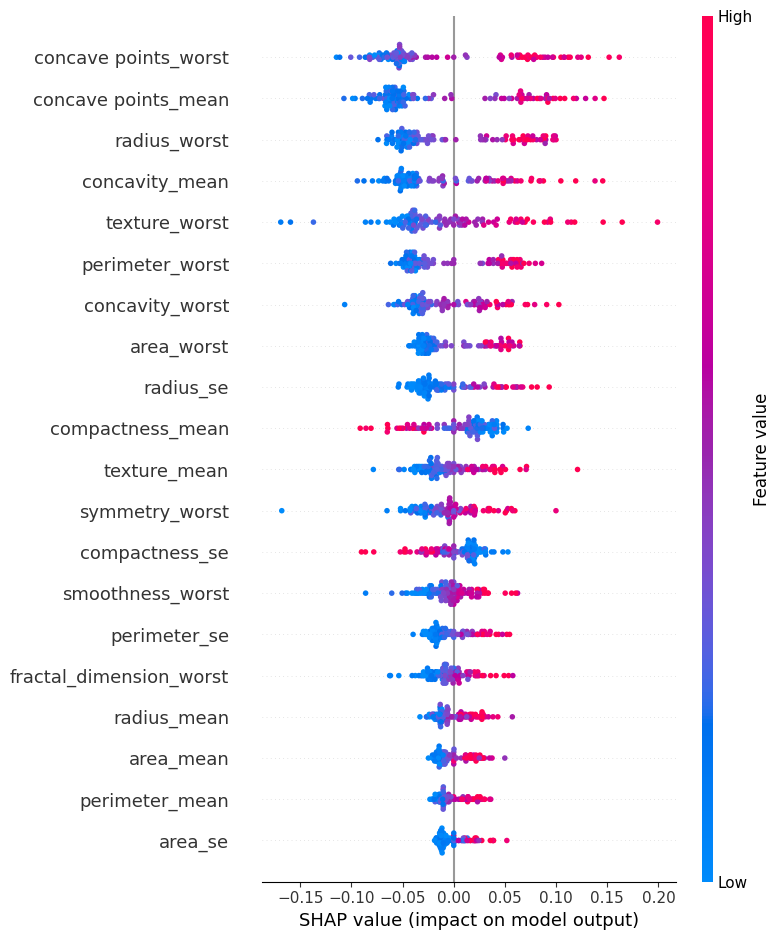

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
shap.summary_plot(s_values, X_test)
df.describe()

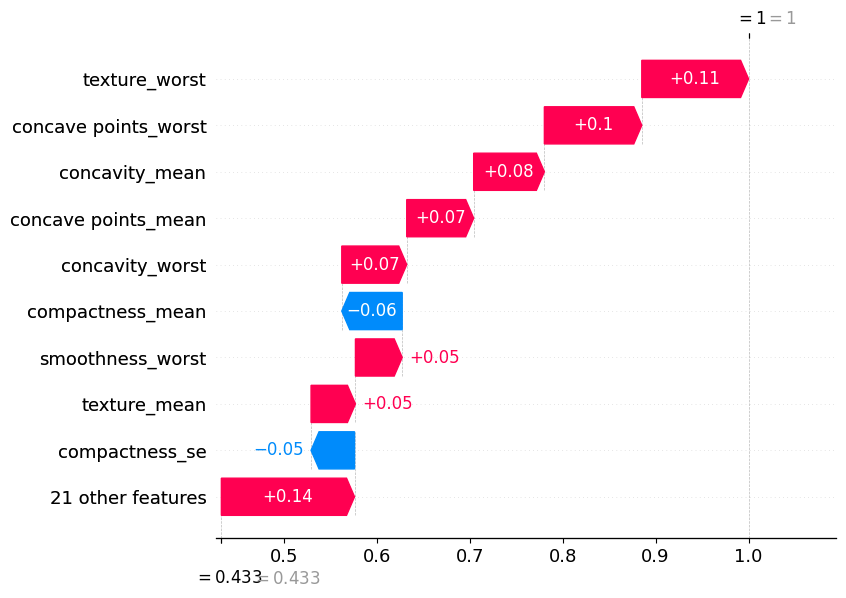

array([0.58161768, 0.56679067, 0.58123143, 0.43202545, 0.37356685,
       0.46782406, 0.38823805, 0.37738569, 0.40050505, 0.26642797,
       0.16089082, 0.05436704, 0.1305659 , 0.11462127, 0.11224802,
       0.23228287, 0.08830808, 0.18266717, 0.10620814, 0.10368559,
       0.57701885, 0.50319829, 0.55276657, 0.40006882, 0.5265139 ,
       0.6128882 , 0.4865016 , 0.61340206, 0.41533609, 0.37557392])

In [18]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, s_values[17],feature_names=X.columns)

X_test.values[11]

In [19]:
from lime import lime_tabular
import lime
explainer_lime = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),mode = 'classification', training_labels=df['diagnosis'], feature_names=X.columns)

#lime_local = lime.explain_local(X_test[-20:],
#                                 y_test[-20:],
#                               name = "Lime")

i = 17


exp=explainer_lime.explain_instance(X_test.values[i], log_reg_best.predict_proba, num_features=31)
exp.show_in_notebook(show_table=True)
X_test.values[i]

X does not have valid feature names, but LogisticRegression was fitted with feature names


array([0.4012968 , 0.48156916, 0.41469145, 0.24933192, 0.59285005,
       0.51414024, 0.47563261, 0.42345924, 0.37727273, 0.4395535 ,
       0.08024624, 0.35378359, 0.10271875, 0.04803529, 0.26600265,
       0.3541022 , 0.15199495, 0.38662625, 0.18528733, 0.17637467,
       0.32657417, 0.64792111, 0.33512625, 0.1779886 , 0.67377666,
       0.45542393, 0.4721246 , 0.74329897, 0.28543268, 0.33884298])

In [20]:
import dalex
#np.random.seed(0)
explainer_dalex = dalex.Explainer(log_reg_best, X_train,y_train)

Preparation of a new explainer is initiated

  -> data              : 455 rows 30 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 455 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002178BBE1360> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.46e-06, mean = 0.379, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.566, mean = -0.00107, max = 0.983
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [21]:
explainer_dalex.model_parts()
explainer_dalex.model_performance()

,recall,precision,f1,accuracy,auc
LogisticRegression,0.97093,0.988166,0.979472,0.984615,0.996713


In [22]:
explainer_dalex.model_parts().plot()

In [23]:
explainer_dalex.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating ceteris paribus: 100%|██████████| 30/30 [00:00<00:00, 74.18it/s]


In [24]:
exp1 = X_test.iloc[17]
y_test.iloc[17]
exp1

radius_mean                0.401297
texture_mean               0.481569
perimeter_mean             0.414691
area_mean                  0.249332
smoothness_mean            0.592850
compactness_mean           0.514140
concavity_mean             0.475633
concave points_mean        0.423459
symmetry_mean              0.377273
fractal_dimension_mean     0.439553
radius_se                  0.080246
texture_se                 0.353784
perimeter_se               0.102719
area_se                    0.048035
smoothness_se              0.266003
compactness_se             0.354102
concavity_se               0.151995
concave points_se          0.386626
symmetry_se                0.185287
fractal_dimension_se       0.176375
radius_worst               0.326574
texture_worst              0.647921
perimeter_worst            0.335126
area_worst                 0.177989
smoothness_worst           0.673777
compactness_worst          0.455424
concavity_worst            0.472125
concave points_worst       0

In [25]:
sample = pd.DataFrame(exp1).T
sample

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
509,0.401297,0.481569,0.414691,0.249332,0.59285,0.51414,0.475633,0.423459,0.377273,0.439553,...,0.326574,0.647921,0.335126,0.177989,0.673777,0.455424,0.472125,0.743299,0.285433,0.338843


In [26]:
explainer_dalex.predict(sample)

array([0.99703449])

In [27]:
sample_explanation = explainer_dalex.predict_parts(sample)
sample_explanation.plot()